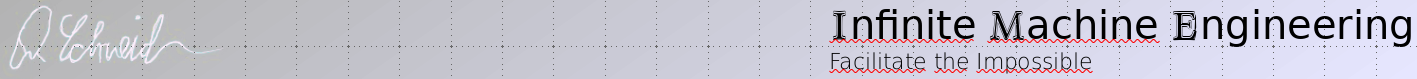

# Field Oriented Control

In [25]:
clear all;
close all;

fig=1;

#available_graphics_toolkits()
#loaded_graphics_toolkits()
graphics_toolkit ("gnuplot");

## Basic Data

In [26]:
frequ = 2;
N=128;
t=linspace(0,N,N);
k=2./3;

soll_q = 85; # in %
phi=2.*pi().*frequ.*t./N;
grad=(360)./(2.*pi()).*phi;

## 3-Phase Motor Currents

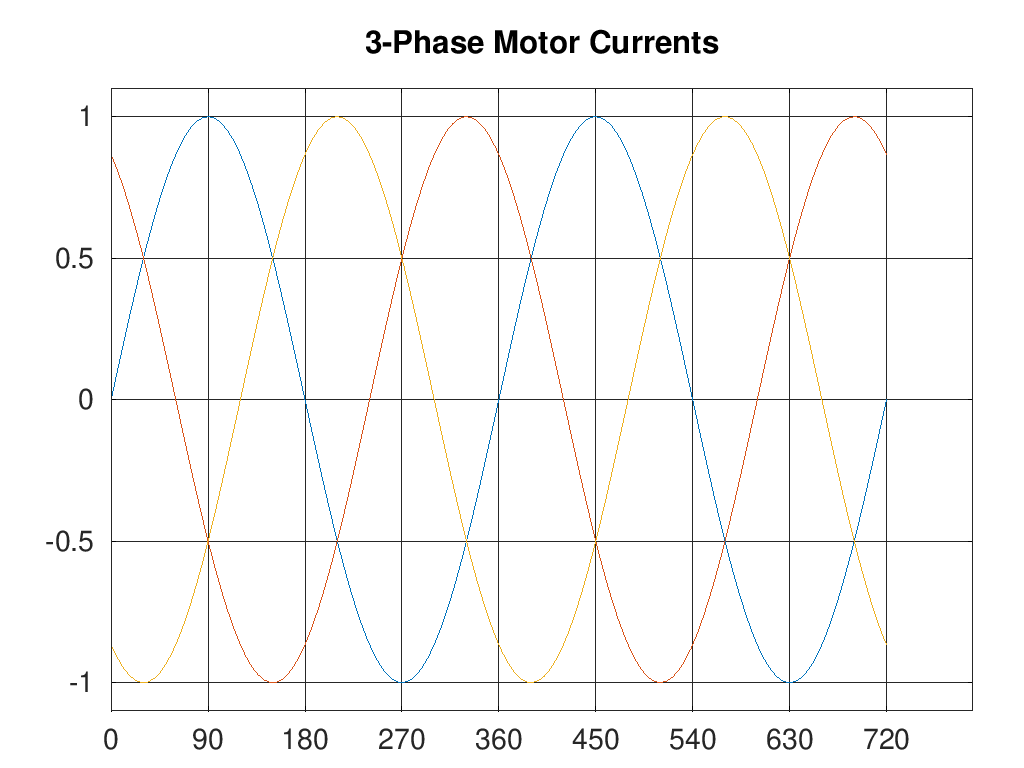

In [27]:
x=sin(phi);
y=sin((phi).+(pi().*k));
z=sin((phi).-(pi().*k));

figure(fig++);
plot(grad,x,grad,y,grad,z);
set(gca,'YLim',[-1.1 1.1]);
set (gca, 'linewidth', 2);
qcircles=floor(max(grad)./90);
tickmax=(qcircles.*90);
xticks(0:tickmax./qcircles:tickmax)
xlabel_grad=0:90:tickmax;
xticklabels(xlabel_grad);
title("3-Phase Motor Currents");
grid on;

## Clarke-Transformation

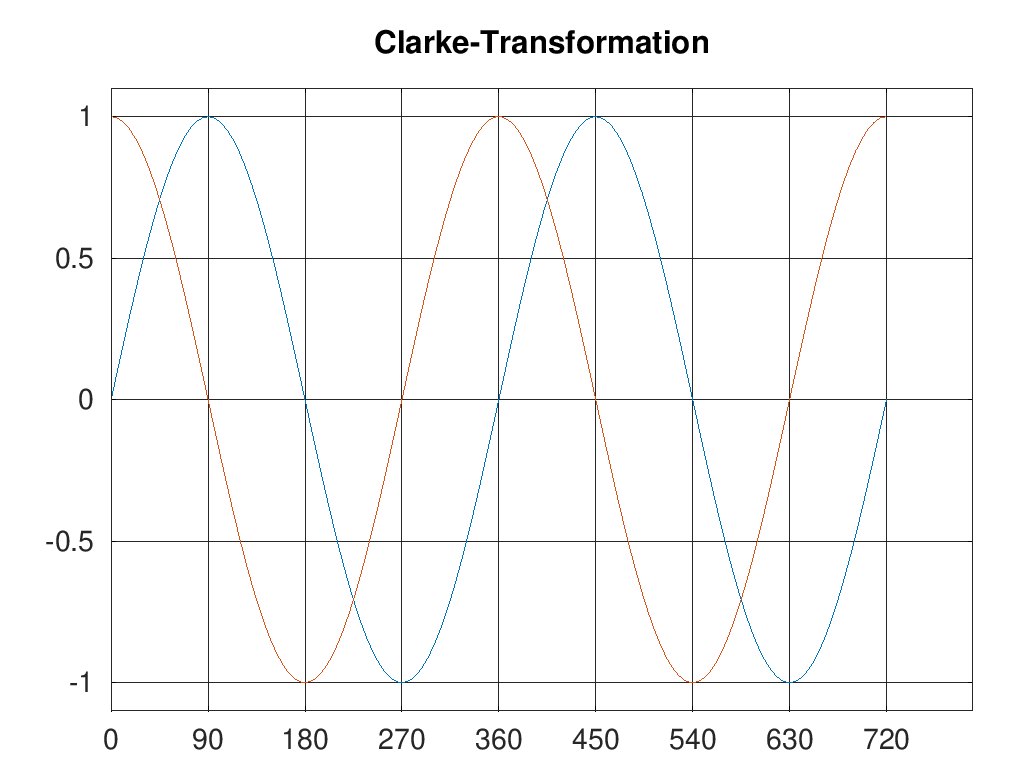

In [28]:
# convert a 3-Phase system to an equivalent 2-Phase system
# so a 3-Phase motor can be handled like a 2-Phase motor
ialpha=k.*(x.-0.5.*(y.+z)); # 2/3i_a-1/3(i_b+i_c)
#ibeta=1./sqrt(3).*(y.-z);  #1/sqrt(3)*(i_b-i_c)
ibeta=k.*sqrt(3).*0.5.*(y.-z);

figure(fig++);
plot(grad,ialpha,grad,ibeta);
set(gca,'YLim',[-1.1 1.1]);
set (gca, 'linewidth', 2);
qcircles=floor(max(grad)./90);
tickmax=(qcircles.*90);
xticks(0:tickmax./qcircles:tickmax)
xlabel_grad=0:90:tickmax;
xticklabels(xlabel_grad);
title("Clarke-Transformation");
grid on;

## simplified Clarke-Transformation
(if sum of all 3 phases is zero at any time --> so not for real world signals!)

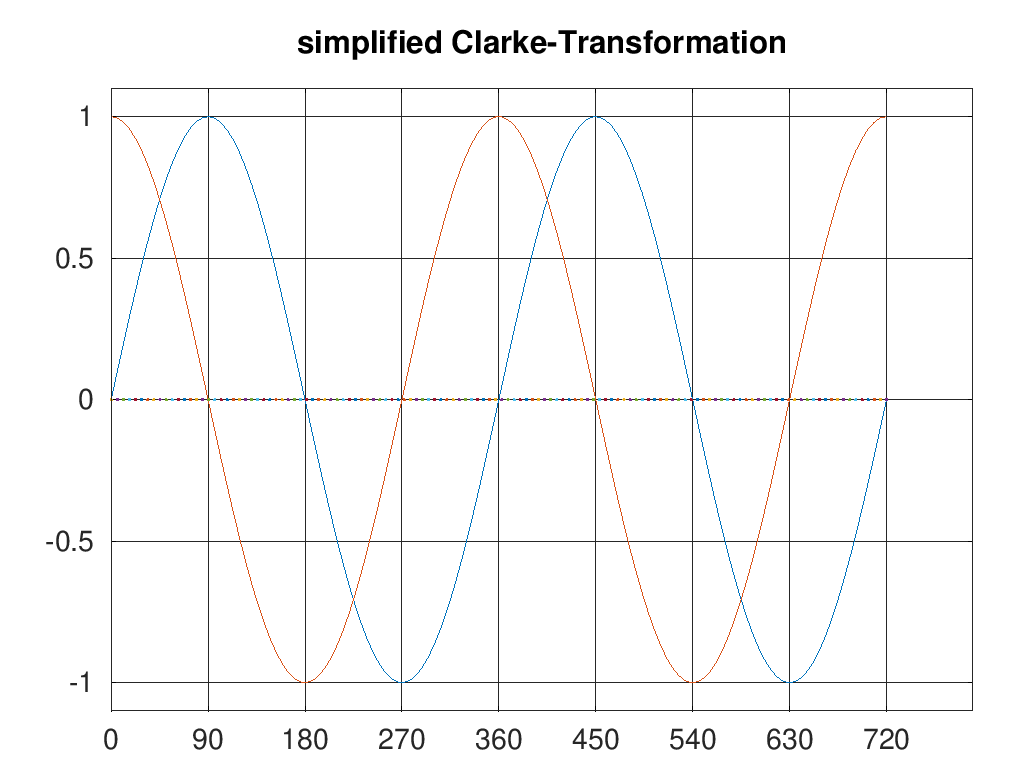

In [29]:
# convert a 3-Phase system to an equivalent 2-Phase system
# so a 3-Phase motor can be handled like a 2-Phase motor
ialpha=x; 
ibeta=1./sqrt(3).*(x.+2.*y);
igamma = 1./3.*sum([x y z]); # balance of asymetric 3 phase system

figure(fig++);
plot(grad,ialpha,grad,ibeta,grad,igamma);
set(gca,'YLim',[-1.1 1.1]);
set (gca, 'linewidth', 2);
qcircles=floor(max(grad)./90);
tickmax=(qcircles.*90);
xticks(0:tickmax./qcircles:tickmax)
xlabel_grad=0:90:tickmax;
xticklabels(xlabel_grad);
title("simplified Clarke-Transformation");
grid on;

## reverse Clarke-Transformation (with igamme to compensate imbalance)

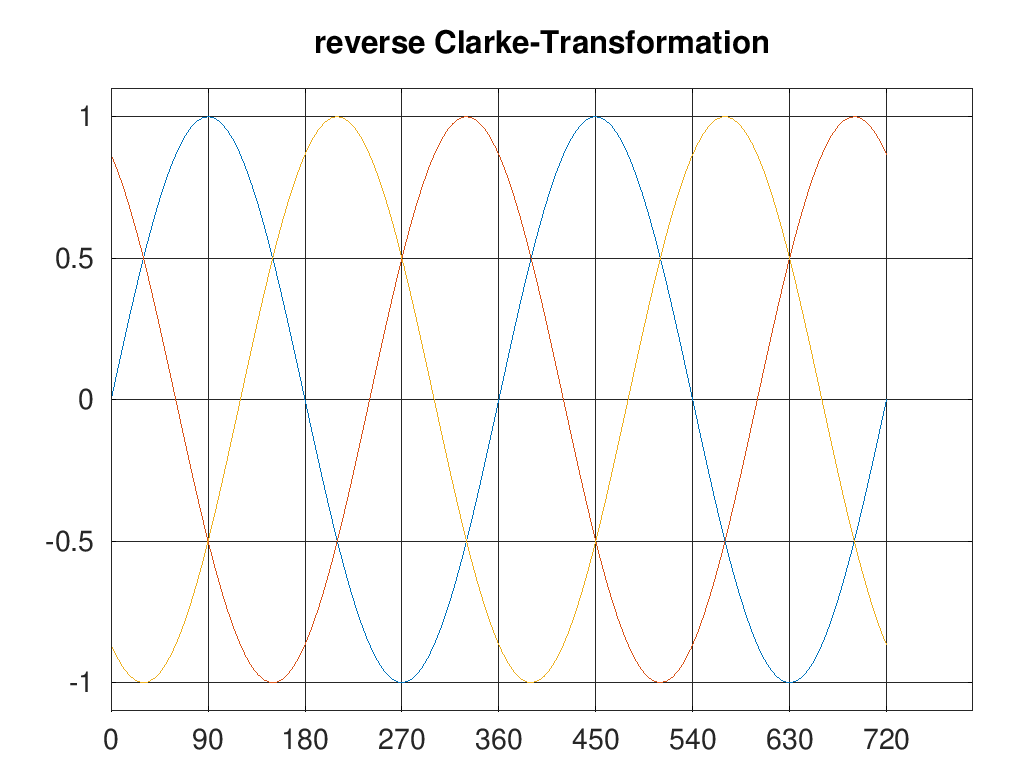

In [30]:
rc_x = ialpha .+ igamma;
rc_y =  0.5.*(sqrt(3).*ibeta .- ialpha) .+ igamma;
rc_z = -0.5.*(sqrt(3).*ibeta .+ ialpha) .+ igamma;

figure(fig++);
plot(grad,rc_x,grad,rc_y,grad,rc_z);
set(gca,'YLim',[-1.1 1.1]);
set (gca, 'linewidth', 2);
qcircles=floor(max(grad)./90);
tickmax=(qcircles.*90);
xticks(0:tickmax./qcircles:tickmax)
xlabel_grad=0:90:tickmax;
xticklabels(xlabel_grad);
title("reverse Clarke-Transformation");
grid on;

## reverse modified Clarke-Transformation

In [31]:
##rc_x = ibeta;
##rc_y =  0.5.*(sqrt(3).*ialpha .- ibeta);
##rc_z = -0.5.*(sqrt(3).*ialpha .+ ibeta);;
##
##figure(fig++);
##plot(grad,rc_x,grad,rc_y,grad,rc_z);
##set(gca,'YLim',[-1.1 1.1]);
##qcircles=floor(max(grad)./90);
##tickmax=(qcircles.*90);
##xticks(0:tickmax./qcircles:tickmax)
##xlabel_grad=0:90:tickmax;
##xticklabels(xlabel_grad);
##title("reverse modified Clarke-Transformation");
##grid on;

## d/q-Transformation (Park-Transformation) from 3-Phase currents

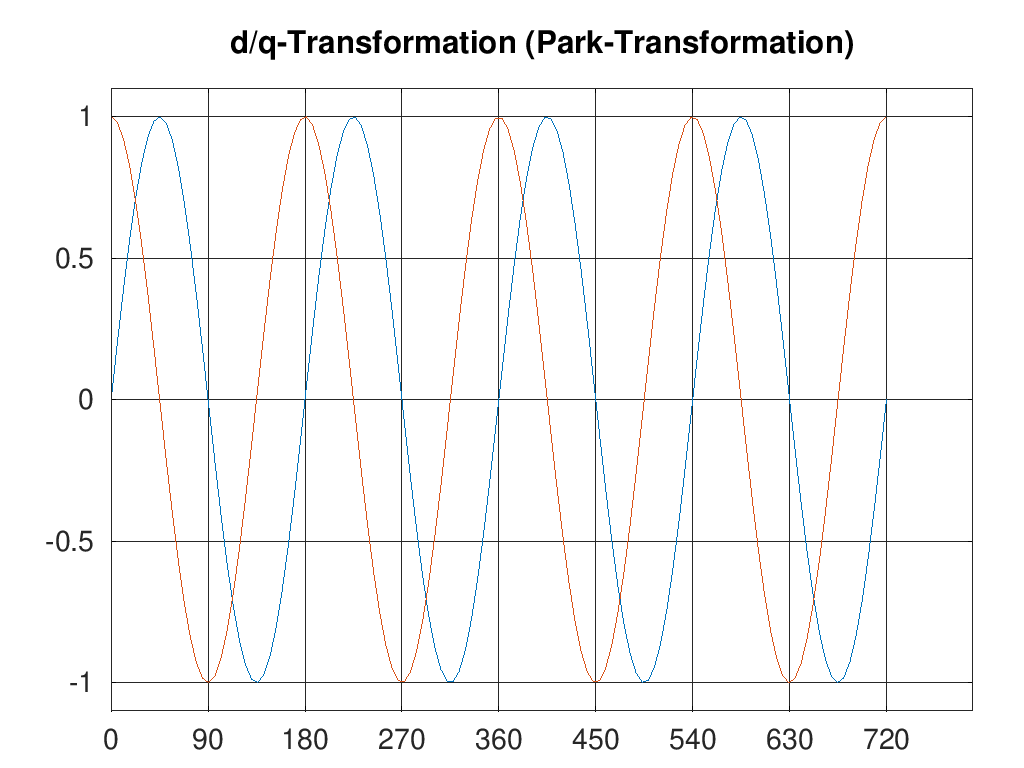

In [32]:
#id_iq = [cos(phi),sin(phi);-sin(phi),cos(phi)]*'[ialpha,ibeta];

#id=( cos(phi).*ialpha.+sin(phi).*ibeta);
#iq=(-sin(phi).*ialpha.+cos(phi).*ibeta);

id=k.*( cos(phi).*x.+cos(phi.-(2.*pi()./3)).*y.+cos(phi.-(4.*pi()./3)).*z );
iq=k.*(-sin(phi).*x.-sin(phi.-(2.*pi()./3)).*y.-sin(phi.-(4.*pi()./3)).*z );

figure(fig++);
plot(grad,id,grad,iq);
set(gca,'YLim',[-1.1 1.1]);
set (gca, 'linewidth', 2);
qcircles=floor(max(grad)./90);
tickmax=(qcircles.*90);
xticks(0:tickmax./qcircles:tickmax)
xlabel_grad=0:90:tickmax;
xticklabels(xlabel_grad);
title("d/q-Transformation (Park-Transformation)");
grid on;

## d/q-Transformation (Park-Transformation) from Clarke Transformation

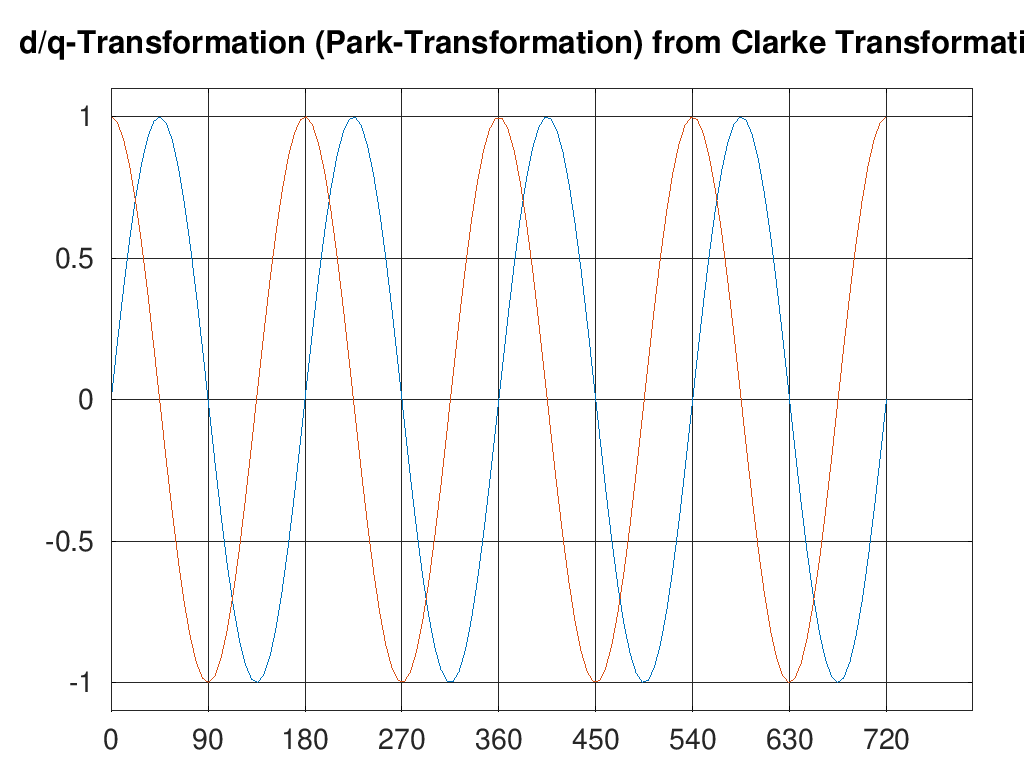

In [33]:
#id_iq = [cos(phi),sin(phi);-sin(phi),cos(phi)]*'[ialpha,ibeta];

id=( cos(phi).*ialpha.+sin(phi).*ibeta);
iq=(-sin(phi).*ialpha.+cos(phi).*ibeta);

#id=k.*( cos(phi).*x.+cos(phi.-(2.*pi()./3)).*y.+cos(phi.-(4.*pi()./3)).*z );
#iq=k.*(-sin(phi).*x.-sin(phi.-(2.*pi()./3)).*y.-sin(phi.-(4.*pi()./3)).*z );

figure(fig++);
plot(grad,id,grad,iq);
set(gca,'YLim',[-1.1 1.1]);
set (gca, 'linewidth', 2);
qcircles=floor(max(grad)./90);
tickmax=(qcircles.*90);
xticks(0:tickmax./qcircles:tickmax)
xlabel_grad=0:90:tickmax;
xticklabels(xlabel_grad);
title("d/q-Transformation (Park-Transformation) from Clarke Transformation");
grid on;

## reverse Park-Transformation

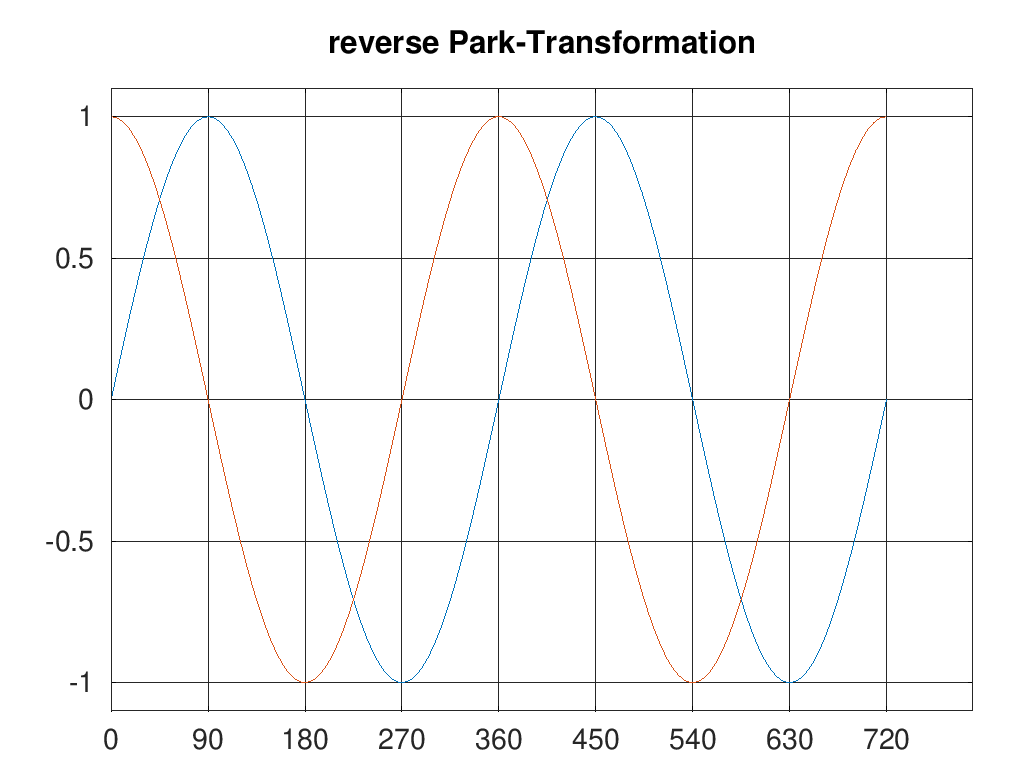

In [34]:
rp_ialpha = id.*cos(phi) .- iq.*sin(phi);
rp_ibeta  = iq.*cos(phi) .+ id.*sin(phi);

figure(fig++);
plot(grad,rp_ialpha,grad,rp_ibeta);
set(gca,'YLim',[-1.1 1.1]);
set (gca, 'linewidth', 2);
qcircles=floor(max(grad)./90);
tickmax=(qcircles.*90);
xticks(0:tickmax./qcircles:tickmax)
xlabel_grad=0:90:tickmax;
xticklabels(xlabel_grad);
title("reverse Park-Transformation");
grid on;